## Bhabha and Moller scattering (chapter 3.2 of the book)
### 1) Introduction


<img src="eetoee.jpg" width="300"/>

In calculating the cross section $e^-e^+\rightarrow e^-e^+$ (Bhabha scattering) the annihilation or $s$ channel 
amplitude $T_s$ (left figure) and the scattering or $t$ channel amplitude $T_t$ (right figure) both contribute. 

For installing this notebook on your system don't forget to download also the figure files eetoee.jpg and
moller.jpg.
Note that the time arrow in these figures is pointing upwards in contrast to the convention of the book. To distinguish in- and outgoing particles the indices $i$ and $f$ are used because the symbol $'$ has an operational meaning in python.

Neglecting the charge factor ($-\imath e^2$) one has
$$T_{fi}=\bar{v}(k_i)\gamma^{\mu}u(p_i)\bar{u}(p_f)\gamma _{\mu}v(k_f)\frac{1}{s}
-\bar{u}(p_f)\gamma^{\mu}u(p_i)\bar{v}(k_i)\gamma _{\mu}v(k_f)\frac{1}{t}$$

The minus sign is requested by the Pauli principle. Its application is easier understood in the case of electron electron scattering.
The Feynman rules interpret positrons as electrons of negative energy moving backward in time. This explains the use of the Pauli principle also here. Another approach to understand the minus sign is to calculate the scattering diagramm as scattering of an electron off a positively charged fermion, i.e $T_t =\bar{u}(p_f)\gamma^{\mu}u(p_i)\bar{u}(k_f)\gamma _{\mu}u(k_i)/t$ leading to charge factor which is the negative of the one used in the annihilation diagram.

### 2) Kinematics
The CM system is used

In [1]:
from sympy import *

In [2]:
import heppackv0 as hep

Reading heppackv0.py (March 2023)

Done


In [3]:
E,m,theta,pin,ki,pf,kf,alpha=symbols('E m theta pin ki pf kf alpha',real=True)
u,t,t0,s,s0=symbols('u t t0,s,s0',real=True)

In [4]:
pin=[E,m,0,0]
ki=[E,m,pi,pi]
pf=[E,m,theta,0]
kf=[E,m,pi-theta,pi]

From $t=(p_f-p_i)^2=-4p^2\sin^2(\theta/2)=(s-4m^2)\sin^2(\theta/2)$ we get

In [5]:
sinthetahalf=sqrt(t/(4*m**2-s))

In [6]:
costhetahalf=sqrt(u/(4*m**2-s))

### 3) The amplitudes
With $|T|^2=|T_s|^2+|T_t|^2-2T_sT_t$ we need explicit expressions for all amplitudes, although the average of the squared annihilation and scattering amplitudes could be taken from the eemumu notebook.  There are 8 independent helicity amplitudes $T_{fi}=T(\lambda_3 \lambda_4;\lambda_1 \lambda_2)$ for incoming positrons with positive helicity $\lambda_2$. $T_{k,s}$ and $T_{k,t}$ are calculated separetely ($k=1..8$).

1) $T(-+;-+)$ :

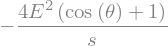

In [7]:
T1s=hep.dotprod4(hep.vbu(ki,1,pin,-1),hep.ubv(pf,-1,kf,1))/s
T1s

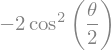

In [8]:
T1sv1=-2*cos(theta/2)**2;T1sv1

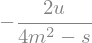

In [9]:
T1s=T1sv1.subs(cos(theta/2),costhetahalf);T1s

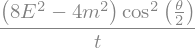

In [10]:
T1tv1=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.vbv(ki,1,kf,1))/t;T1tv1

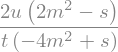

In [11]:
T1t=simplify((2*s-4*m**2)*costhetahalf**2/t);T1t

2) $T(-,-;-,+)$ :

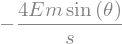

In [12]:
T2sv1=hep.dotprod4(hep.vbu(ki,1,pin,-1),hep.ubv(pf,-1,kf,-1))/s;T2sv1

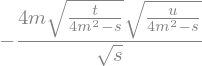

In [13]:
T2s=-8*m*sinthetahalf*costhetahalf/2/sqrt(s);T2s

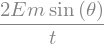

In [14]:
T2tv1=hep.dotprod4(hep.ubu(pf,-1,pin,-1),hep.vbv(ki,1,kf,-1))/t;T2tv1

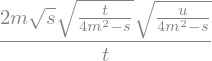

In [15]:
T2t=4*m*sinthetahalf*costhetahalf*sqrt(s)/2/t;T2t

3) $T(+,+;-,+)$ :

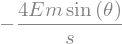

In [16]:
T3s=hep.dotprod4(hep.vbu(ki,1,pin,-1),hep.ubv(pf,1,kf,1))/s;T3s

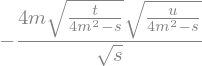

In [17]:
T3s=T2s;T3s

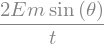

In [18]:
T3t=hep.dotprod4(hep.ubu(pf,1,pin,-1),hep.vbv(ki,1,kf,1))/t;T3t

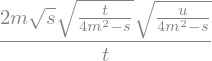

In [19]:
T3t=T2t;T3t

4) $T(+,-;-,+)$ :

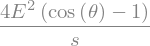

In [20]:
T4sv1=hep.dotprod4(hep.vbu(ki,1,pin,-1),hep.ubv(pf,1,kf,-1))/s;T4sv1

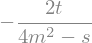

In [21]:
T4s=-2*sinthetahalf**2;T4s

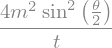

In [22]:
T4tv1=hep.dotprod4(hep.ubu(pf,1,pin,-1),hep.vbv(ki,1,kf,-1))/t;T4tv1

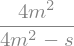

In [23]:
T4t=4*m**2*sinthetahalf**2/t;T4t

5) $T(-,+;+,+)$ :

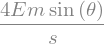

In [24]:
T5s=hep.dotprod4(hep.vbu(ki,1,pin,1),hep.ubv(pf,-1,kf,1))/s;T5s

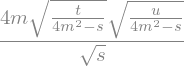

In [25]:
T5s=-T2s;T5s

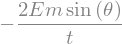

In [26]:
T5t=hep.dotprod4(hep.ubu(pf,-1,pin,1),hep.vbv(ki,1,kf,1))/t;T5t

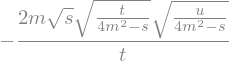

In [27]:
T5t=-T2t;T5t

6) $T(-,-;+,+)$ :

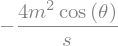

In [28]:
T6sv1=hep.dotprod4(hep.vbu(ki,1,pin,1),hep.ubv(pf,-1,kf,-1))/s
T6sv1

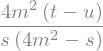

In [29]:
T6s=simplify(-4*m**2*(costhetahalf**2-sinthetahalf**2)/s)
T6s

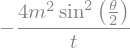

In [30]:
T6t=hep.dotprod4(hep.ubu(pf,-1,pin,1),hep.vbv(ki,1,kf,-1))/t;T6t

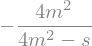

In [31]:
T6t=-T4t;T6t

7) $T(+,+;+,+)$ :

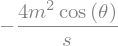

In [32]:
T7s=hep.dotprod4(hep.vbu(ki,1,pin,1),hep.ubv(pf,1,kf,1))/s;T7s

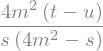

In [33]:
T7s=T6s;T7s

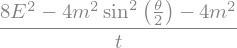

In [34]:
T7tv1=hep.dotprod4(hep.ubu(pf,1,pin,1),hep.vbv(ki,1,kf,1))/t;T7tv1

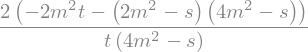

In [35]:
T7t=simplify((2*s-4*m**2*sinthetahalf**2-4*m**2)/t);T7t

8) $T(+,-;+,+)$ :

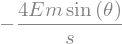

In [36]:
T8sv1=hep.dotprod4(hep.vbu(ki,1,pin,1),hep.ubv(pf,1,kf,-1))/s;T8sv1

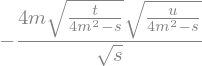

In [37]:
T8s=T2s;T8s

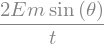

In [38]:
T8tv1=hep.dotprod4(hep.ubu(pin,1,pf,1),hep.vbv(ki,1,kf,-1))/t;T8tv1

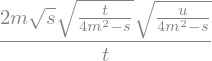

In [39]:
T8t=T2t;T8t

### 4) Cross sections
Start with $\frac{1}{2}\sum_k |T_{s,k}|^2$

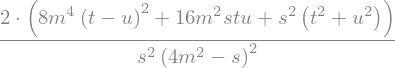

In [40]:
tsqavsv1=simplify(T1s**2+T2s**2+T3s**2+T4s**2+T5s**2+T6s**2+T7s**2+T8s**2)/2;tsqavsv1

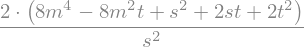

In [41]:
tsqavsv2=simplify(tsqavsv1.subs(u,4*m**2-s-t));tsqavsv2

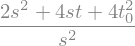

In [42]:
tsqavs=2*(2*t0**2+s**2+2*s*t)/s**2;tsqavs

This is the result of the eemumu notebook. An alternative form can be found in the textbook of Landau and Lifshitz:

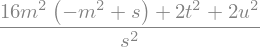

In [43]:
tsqavsalt=2*(u**2+t**2+8*m**2*(s-m**2))/s**2;tsqavsalt

In [44]:
check1=simplify((tsqavsv2-tsqavsalt).subs(u,4*m**2-s-t));check1

Next step $\frac{1}{2}\sum_k |T_{t,k}|^2$:

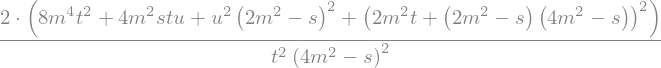

In [45]:
tsqavtv1=simplify(T1t**2+T2t**2+T3t**2+T4t**2+T5t**2+T6t**2+T7t**2+T8t**2)/2;tsqavtv1

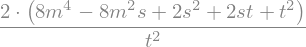

In [46]:
tsqavtv2=simplify(tsqavtv1.subs(u,4*m**2-s-t));tsqavtv2

This is tsqavsv2 (line 43) with $s\leftrightarrow t$ as it should be. The alternative expression of Landau Lifshitz is:

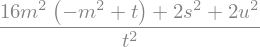

In [47]:
tsqavtalt=2*(u**2+s**2+8*m**2*(t-m**2))/t**2;tsqavtalt

In [48]:
check2=simplify((tsqavtv2-tsqavtalt).subs(u,4*m**2-s-t));check2

Finally the interference term -$\sum_k T_{s,k}T_{t,k}$

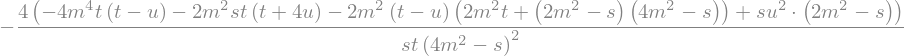

In [49]:
Tstv1=-simplify(T1s*T1t+T2s*T2t+T3s*T3t+T4s*T4t+T5s*T5t+T6s*T6t+T7s*T7t+T8s*T8t);Tstv1

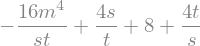

In [50]:
Tst=simplify(Tstv1.subs(u,4*m**2-s-t));Tst

or


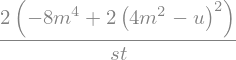

In [51]:
print ('or'); Tstv2=2/s/t*(-8*m**4+2*(4*m**2-u)**2);Tstv2


or a la Landau Lifshitz 


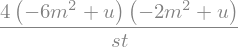

In [52]:
print ('or a la Landau Lifshitz '); Tstalt=4/t/s*(u-2*m**2)*(u-6*m**2);Tstalt

In [53]:
check3=simplify((Tstv2-Tstalt));check3

Multiplying with the charge factor $16\pi^2\alpha^2$ and dividing by the kinematic factor 
$16\pi s(s-4m^2)$ we obtain

$$\frac{\mathrm{d}\sigma }{\mathrm{d}t}(e^-e^+\rightarrow e^-e^+)
=\frac{2\pi\alpha^{2}}{s(s-4m^{2})}\left(A+B+C\right)\enspace$$
with 
$$A=1+2\frac{t}{s}+2\frac{t_0^2}{s^2}\\
B=1+2\frac{s}{t}+2\frac{s_0^2}{t^2}\\
C=2\left(2+\frac{s}{t}+\frac{t}{s}-\frac{4m^4}{st}\right)$$
using the abbreviatons $s_0=s-m^2$ and $t_0=t-m^2$.
If you prefer the Landau Lifshitz version (Note their $A$ is our $B$ and vice versa), here it is:
$$A=\frac{1}{s^2}(t^2+u^2+8m^2s_0)\\
B=\frac{1}{t^2}(s^2+u^2+8m^2t_0)\\
C=\frac{2}{st}(u-2m^2)(u-6m^2)$$

In calculating the cross section for electron electron scatterin $e^-e^-\rightarrow e^-e^-$ (Moller scattering)
the annihilation diagramm ($s$ channel)  has to be replaced by the  crossed exchange diagram with the
photon propagator given by $1/u$ (so called $u$ channel).

<img src="moller.jpg" width="200"/>

If one is only interested in the cross section it suffices to replace $s\leftrightarrow u$ in the formula for the
average squared amplitudes, i.e.
$$A'=1+2\frac{t}{u}+2\frac{t_0^2}{u^2}=\frac{1}{u^2}(t^2+s^2+8m^2u_0^2)\\
C'=2\left(2+\frac{u}{t}+\frac{t}{u}-\frac{4m^4}{ut}\right)=\frac{2}{ut}(s-2m^2)(s-6m^2)\enspace .$$
Obviously $B$ does not change.
For later use the $u$ channel amplitudes are also explicitly given.

1) $T_u(-,+;-,+)$ :

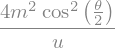

In [54]:
T1uv1=hep.dotprod4(hep.ubu(kf,1,pin,-1),hep.ubu(pf,-1,ki,1))/u;T1uv1

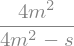

In [55]:
T1u=simplify(4*m**2*costhetahalf**2/u);T1u

2) $T_u(-,-;-,+)$ :

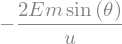

In [56]:
T2uv1=hep.dotprod4(hep.ubu(kf,-1,pin,-1),hep.ubu(pf,-1,ki,1))/u;T2uv1

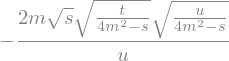

In [57]:
T2u=-4*m*sinthetahalf*costhetahalf*sqrt(s)/2/u;T2u

3) $T_u(+,+;-,+)$ :

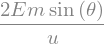

In [58]:
T3u=hep.dotprod4(hep.ubu(kf,1,pin,-1),hep.ubu(pf,1,ki,1))/u;T3u

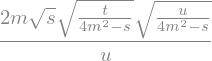

In [59]:
T3u=-T2u;T3u

4) $T_u(+,-;-,+)$ :

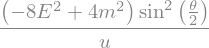

In [60]:
T4uv1=hep.dotprod4(hep.ubu(kf,-1,pin,-1),hep.ubu(pf,1,ki,1))/u;T4uv1

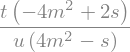

In [61]:
T4u=(2*s-4*m**2)*sinthetahalf**2/u;T4u

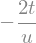

In [62]:
T4u.subs(m,0)

5) $T_u(-,+;+,+)$ :

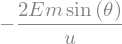

In [63]:
T5u=hep.dotprod4(hep.ubu(kf,1,pin,1),hep.ubu(pf,-1,ki,1))/u;T5u

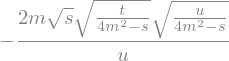

In [64]:
T5u=T2u;T5u

6) $T_u(-,-;+,+)$ :

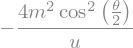

In [65]:
T6u=hep.dotprod4(hep.ubu(kf,-1,pin,1),hep.ubu(pf,-1,ki,1))/u;T6u

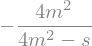

In [66]:
T6u=-T1u;T6u

7) $T_u(+,+;+,+)$ :

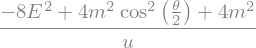

In [67]:
T7uv1=hep.dotprod4(hep.ubu(kf,1,pin,1),hep.ubu(pf,1,ki,1))/u;T7uv1

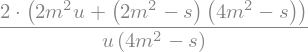

In [68]:
T7u=simplify((-2*s+4*m**2*costhetahalf**2+4*m**2)/u);T7u

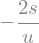

In [69]:
T7u.subs(m,0)

8) $T_u(+,-;+,+)$ :

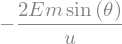

In [70]:
T8uv1=hep.dotprod4(hep.ubu(kf,-1,pin,1),hep.ubu(pf,1,ki,1))/u;T8uv1

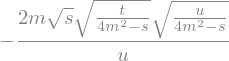

In [71]:
T8u=T2u;T8u

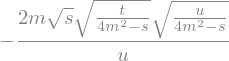

In [72]:
T8u